In [1]:
import pandas as pd
import numpy as np

Load the dataset

In [2]:
data = pd.read_csv('HW3data.csv',header=None)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,0,2.080754,1.099069,0.927763,1.029081,-0.130763,1.265460,-0.436286,0.728881,2.107979,...,-0.825403,-0.138451,0.382957,0.876697,-0.216234,-1.408300,0.393327,-0.148522,1.591533,-0.217481
1,1,1.109457,0.786453,0.445560,-0.146323,-0.996316,0.555759,0.290734,-0.145259,1.132660,...,-1.056288,-0.205499,-1.815374,0.324373,-1.296909,-0.870757,1.108739,1.094010,-0.492141,-1.554079
2,0,-0.676530,1.693100,1.559247,1.559983,-0.982179,-1.358507,-1.313994,-0.455067,0.295214,...,1.242968,1.230157,-2.038999,2.366093,0.820656,1.404501,0.176860,-0.086285,-0.390878,-0.089465
3,1,0.534396,1.677537,1.489030,0.778605,-0.183776,-1.116850,-1.487557,-0.579511,0.292683,...,0.559852,-0.593149,-4.440577,1.720705,-0.124617,-0.435880,0.228440,-0.893938,1.005879,-0.631247
4,0,-1.018903,0.511080,0.755641,1.013816,0.529899,0.160440,-0.087055,1.295290,0.458736,...,0.227110,0.497628,-0.083921,-0.382733,-0.913389,1.122928,0.834571,-0.283786,-2.860340,0.280871
5,1,-1.185369,-0.514473,-0.566634,1.224720,0.619244,-0.684713,-0.798129,1.368770,-0.697007,...,0.926855,0.302304,0.302785,-1.170087,-1.189162,0.418884,-2.247347,-0.455263,-1.528083,0.327891
6,0,1.779054,0.423947,0.820696,2.525687,0.666921,0.661346,0.425365,0.165247,1.967905,...,0.284194,-0.555516,-1.455897,-0.240853,0.249138,-0.915572,-0.764530,-0.808293,0.003886,-0.379341
7,1,-0.889638,-0.315453,-0.073131,1.157503,-0.311039,-0.364472,-1.621636,1.192999,0.689805,...,-0.113531,-0.485290,-0.094577,-0.809093,0.453226,-0.009268,-0.872640,-1.730826,0.665384,0.977573
8,0,-0.659694,-0.184388,-0.540022,1.122418,0.562609,-2.988315,-2.349808,-1.325007,-0.017002,...,-0.819396,-0.952811,0.065197,0.985648,0.745522,0.508879,0.846929,0.644346,0.156497,-0.147716
9,1,-1.225801,-0.212615,-0.588923,1.335412,-0.356505,0.354394,0.699607,0.190782,-0.139117,...,1.772469,0.804056,-0.361595,-0.975587,-0.652528,-0.106173,-0.613650,-0.886065,0.645764,0.142760


In [4]:
X = data.values[:,1:2001]
y = data.values[:,0]

In [5]:
X

array([[ 2.080754,  1.099069,  0.927763, ..., -0.148522,  1.591533,
        -0.217481],
       [ 1.109457,  0.786453,  0.44556 , ...,  1.09401 , -0.492141,
        -1.554079],
       [-0.67653 ,  1.6931  ,  1.559247, ..., -0.086285, -0.390878,
        -0.089465],
       ...,
       [ 0.200706, -0.668545, -0.935933, ...,  0.605018,  1.344914,
        -2.485066],
       [ 0.829749,  0.299447,  0.130738, ...,  0.98563 , -0.210661,
        -0.391249],
       [ 0.566684, -0.53366 , -0.761951, ..., -0.45384 ,  0.194535,
         0.06415 ]])

In [6]:
y

array([0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.])

Data Preprocessing

In [7]:
from sklearn import preprocessing

Scale the data attributes

In [8]:
scaled_X = preprocessing.scale(X)

Normalize the data attributes

In [9]:
normalized_X = preprocessing.normalize(scaled_X)

Standardize the data attributes

In [10]:
standardized_X = preprocessing.scale(normalized_X)

Recursive Feature Elimination method (REF) with crossing validation

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import LinearSVC, SVC

Create the RFE object and compute a cross-validated score.

In [12]:
estimator = LinearSVC()
selector = RFECV(estimator=estimator, cv=StratifiedKFold(3),scoring = 'accuracy')
selector.fit(standardized_X, y)
print("N_features %s" % selector.n_features_)
print("Support is %s" % selector.support_)
print("Ranking %s" % selector.ranking_)
print("Grid Scores %s" % selector.grid_scores_)

N_features 13
Support is [False False False ... False False False]
Ranking [ 795 1939 1404 ...  298  547  328]
Grid Scores [0.58333333 0.66212121 0.69848485 ... 0.56363636 0.56363636 0.56363636]


Plot number of features VS. cross-validation scores

In [13]:
import matplotlib.pyplot as plt

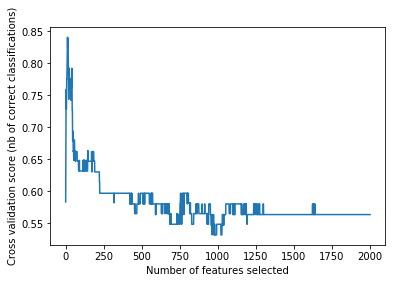

In [14]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

Hold out method

In [15]:
transformed_X = selector.transform(scaled_X)

In [16]:
transformed_X.shape

(62, 13)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = \
    train_test_split(transformed_X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

In [19]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", y_test.shape)

X_train shape:  (49, 13)
Y_train shape:  (49,)
X_test shape:  (13, 13)
Y_test shape:  (13,)


Report the performance

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [21]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.846
